# Project 1

## What teams spend the most money on players

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df_salaries = pd.read_csv("core/Salaries.csv")
df_salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [32]:
df_1985 = df_salaries[df_salaries['yearID'] == 2016]
salary_by_team = df_1985.groupby('teamID')['salary'].sum().reset_index()
salary_by_team

,teamID,salary
0,ARI,87439063
1,ATL,68498291
2,BAL,161863456
3,BOS,188545761
4,CHA,112998667
5,CHN,154067668
6,CIN,88940059
7,CLE,74311900
8,COL,112645071
9,DET,194876481


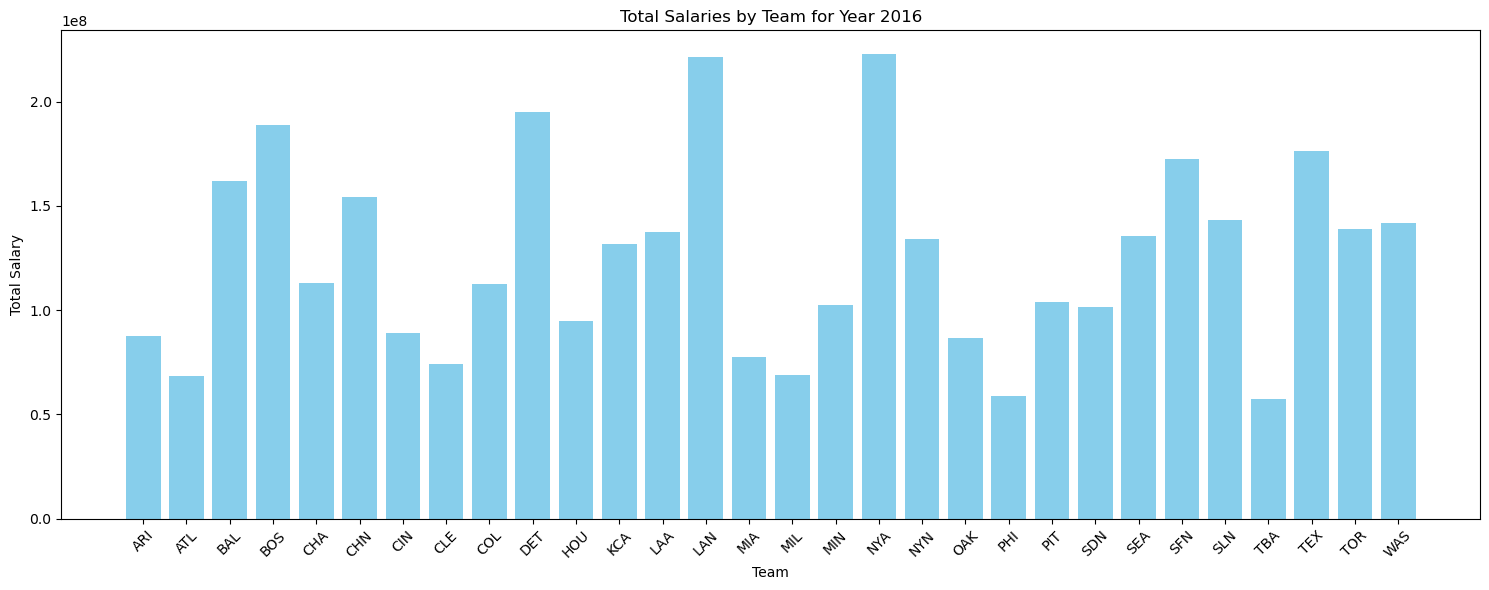

In [33]:
plt.figure(figsize=(15, 6))  # Optional: Set the figure size
plt.bar(salary_by_team['teamID'], salary_by_team['salary'], color='skyblue')
plt.title(f'Total Salaries by Team for Year 2016')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [34]:
df_teams = pd.read_csv("core/Teams.csv")
df_1985 = df_teams[df_teams['yearID'] == 2016]
df_1985_rank = df_1985[["teamID", "Rank", "name"]]
df_1985_rank.sort_values(by=['Rank'])

,teamID,Rank,name
2834,WAS,1,Washington Nationals
2832,TEX,1,Texas Rangers
2808,BOS,1,Boston Red Sox
2810,CHN,1,Chicago Cubs
2812,CLE,1,Cleveland Indians
2818,LAN,1,Los Angeles Dodgers
2807,BAL,2,Baltimore Orioles
2830,SLN,2,St. Louis Cardinals
2829,SFN,2,San Francisco Giants
2828,SEA,2,Seattle Mariners


## How much money was in the league during the years

In [35]:
salary_max = df_salaries.groupby('yearID')['salary'].max().reset_index()
salary_min = df_salaries.groupby('yearID')['salary'].min().reset_index()
salary_min = salary_min[salary_min['salary'] != 0]
merged_salaries = pd.merge(salary_max, salary_min, on='yearID', suffixes=('_max', '_min'))
merged_salaries

,yearID,salary_max,salary_min
0,1985,2130300,60000
1,1986,2800000,60000
2,1987,2127333,62500
3,1988,2340000,62500
4,1989,2766667,62500
5,1990,3200000,100000
6,1991,3800000,100000
7,1992,6100000,109000
8,1994,6300000,50000
9,1995,9237500,109000


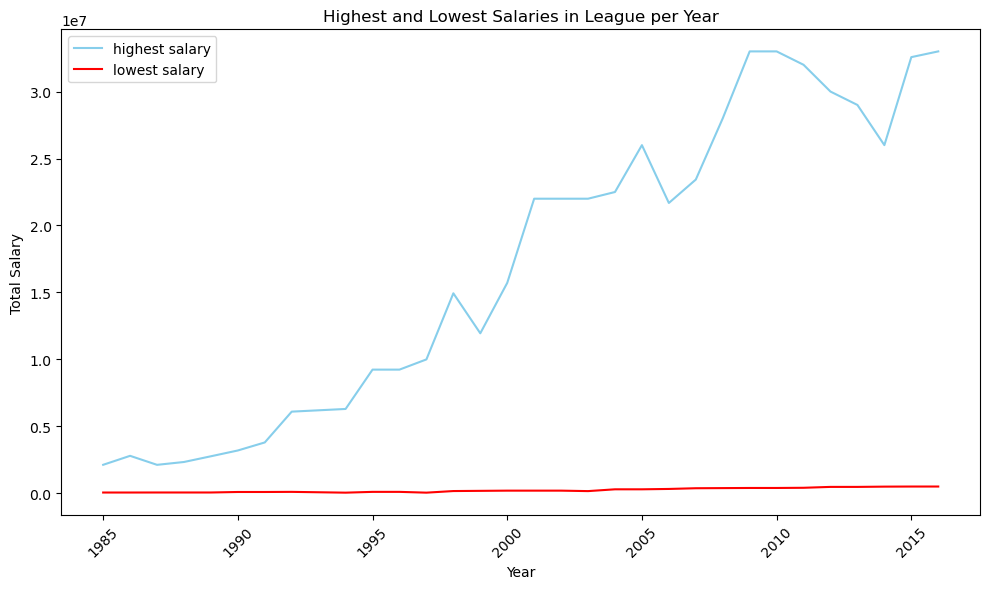

In [36]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(salary_max['yearID'], salary_max['salary'], color='skyblue', label="highest salary")
plt.plot(salary_min['yearID'], salary_min['salary'], color='red', label="lowest salary")
plt.title(f'Highest and Lowest Salaries in League per Year')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Are Baseball players Getting better?

In [37]:
df_batting = pd.read_csv("core/Batting.csv")
df_pitching = pd.read_csv("core/Pitching.csv")

hits_by_year = df_batting.groupby('yearID')['H'].sum().reset_index()
homeruns_by_year = df_batting.groupby('yearID')['HR'].sum().reset_index()
ab_by_year = df_batting.groupby('yearID')['AB'].sum().reset_index()
strikes_by_year = df_batting.groupby('yearID')['SO'].sum().reset_index()
p_strikes_by_year = df_pitching.groupby('yearID')['SO'].sum().reset_index()

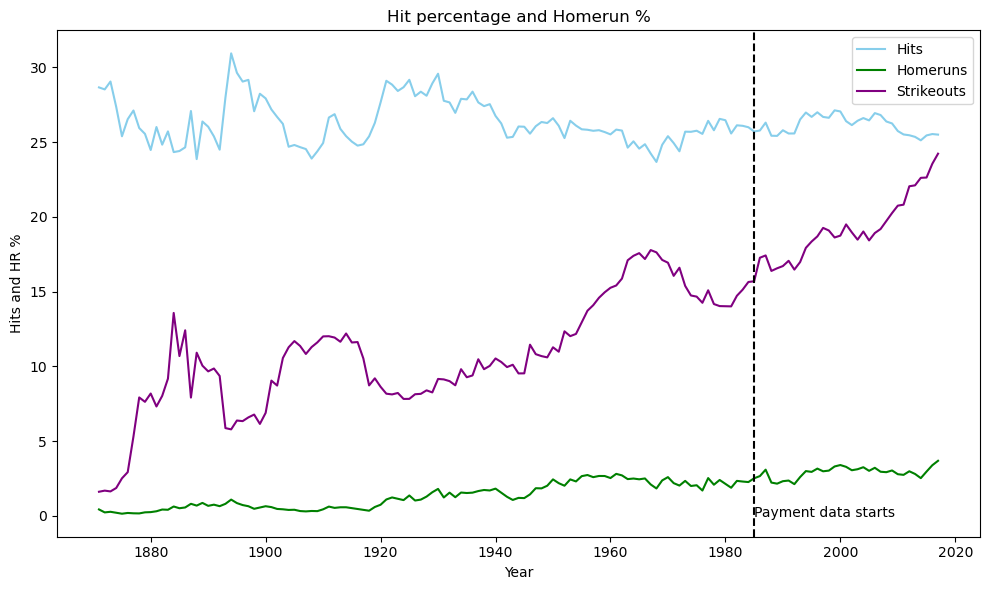

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(hits_by_year['yearID'], 100* hits_by_year['H'] / ab_by_year['AB'], color='skyblue')
plt.plot(homeruns_by_year['yearID'], 100* homeruns_by_year['HR'] / ab_by_year['AB'], color='green')
plt.plot(p_strikes_by_year['yearID'], 100* p_strikes_by_year['SO'] / ab_by_year['AB'], color='purple')

plt.title('Hit percentage and Homerun %')
plt.xlabel('Year')
plt.ylabel('Hits and HR %')
plt.legend(['Hits', 'Homeruns', 'Strikeouts'])

# plt.axvline(x=1985, color='black', linestyle='--')
# plt.text(1985, .22, f"Payment data starts", color='black', rotation=0, va='center')

plt.tight_layout()
plt.show()

## Strikeouts over the years

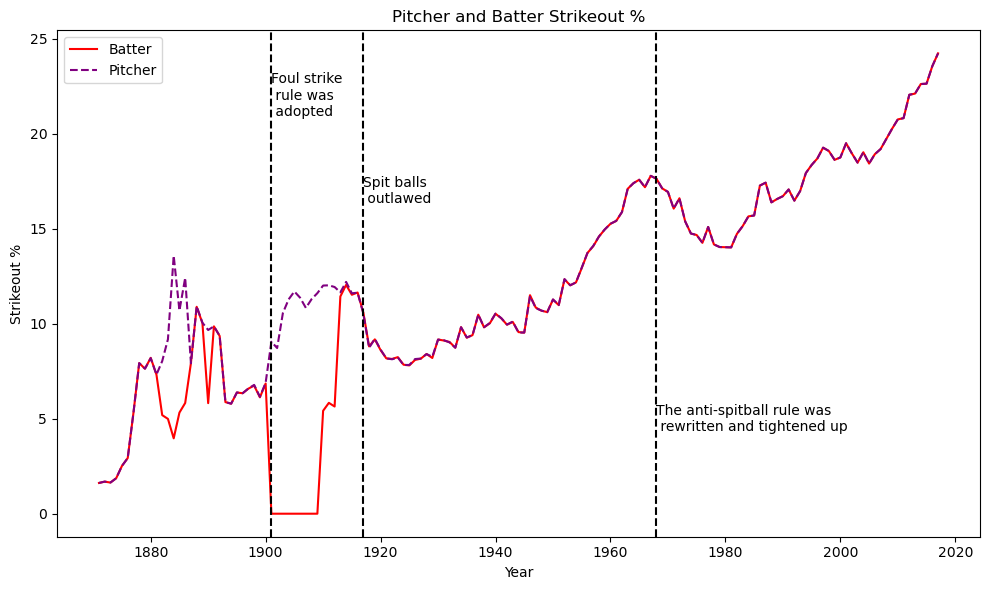

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(strikes_by_year['yearID'], 100*strikes_by_year['SO'] / ab_by_year['AB'], color='red')
plt.plot(p_strikes_by_year['yearID'], 100*p_strikes_by_year['SO'] / ab_by_year['AB'], color='purple', linestyle='dashed')
plt.title('Pitcher and Batter Strikeout %')
plt.xlabel('Year')
plt.ylabel('Strikeout %')
plt.legend(['Batter', 'Pitcher'])

# rules gotten from: https://www.baseball-almanac.com/rulechng.shtml
plt.axvline(x=1901, color='black', linestyle='--')
plt.text(1901, 22, f"Foul strike\n rule was\n adopted", color='black', rotation=0, va='center')

plt.axvline(x=1917, color='black', linestyle='--')
plt.text(1917, 17, f"Spit balls\n outlawed", color='black', rotation=0, va='center')

plt.axvline(x=1968, color='black', linestyle='--')
plt.text(1968, 5, f"The anti-spitball rule was\n rewritten and tightened up", color='black', rotation=0, va='center')

plt.tight_layout()
plt.show()